# 9 Pandas分组与聚合

In [1]:
import pandas as pd
import numpy as np
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)

print(df_obj) #两列是字符串，两列是数值

  key1   key2     data1     data2
0    a    one  0.790819 -0.551726
1    b    one  2.328619  0.302788
2    a    two -3.114707  1.484679
3    b  three -1.427779 -0.874004
4    a    two  0.117080 -0.244159
5    b    two  0.964935 -0.872349
6    a    one -0.302208 -0.296385
7    a  three -1.151873 -0.845638


In [2]:
# dataframe根据key1进行分组，分组后的对象类型
# 不进行聚合操作拿到的只是groupby的对象
print(df_obj.groupby('key1'))
print(type(df_obj.groupby('key1')))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [3]:
group1=df_obj.groupby('key1')
for name,group in group1: # 遍历分组
    print(name)
    print(group)

a
  key1   key2     data1     data2
0    a    one  0.790819 -0.551726
2    a    two -3.114707  1.484679
4    a    two  0.117080 -0.244159
6    a    one -0.302208 -0.296385
7    a  three -1.151873 -0.845638
b
  key1   key2     data1     data2
1    b    one  2.328619  0.302788
3    b  three -1.427779 -0.874004
5    b    two  0.964935 -0.872349


In [4]:
print(df_obj['data1'])
# dataframe的 data1 列根据 key1 进行分组
print('-'*50)
print(type(df_obj['data1'].groupby(df_obj['key1'])))

0    0.790819
1    2.328619
2   -3.114707
3   -1.427779
4    0.117080
5    0.964935
6   -0.302208
7   -1.151873
Name: data1, dtype: float64
--------------------------------------------------
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [6]:
# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean(numeric_only=True)) #不是数值类型的不会算均值
print('-'*50)
grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())


         data1     data2
key1                    
a    -0.732178 -0.090646
b     0.621925 -0.481188
--------------------------------------------------
key1
a   -0.732178
b    0.621925
Name: data1, dtype: float64


### 9.1.3 按自定义的key分组（不重要，无需掌握）

In [ ]:
# # 按自定义key分组，列表
self_def_key = [0, 1, 2, 3, 3, 3, 5, 7]
print(df_obj.groupby(self_def_key).size())  #等于mysql的count
print(df_obj.groupby(self_def_key).sum())

In [ ]:
# 按自定义key分组，多层列表
print(df_obj.groupby([df_obj['key1'], df_obj['key2']]).size())

# # 按多个列多层分组
print('-'*50)
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2.size())

In [5]:
# # 多层分组按key的顺序进行
print('-'*50)
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.size()) #series,类似mysql的count
print(type(grouped3.size()))
print(grouped3.mean())

--------------------------------------------------
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
<class 'pandas.core.series.Series'>
               data1     data2
key2  key1                    
one   a    -0.790356 -0.654034
      b    -0.079730 -0.387669
three a     0.532789  0.685627
      b     0.740374 -0.376233
two   a     0.365328 -0.912014
      b    -0.027914  0.919135


In [6]:
print(grouped3.mean().index)

MultiIndex([(  'one', 'a'),
            (  'one', 'b'),
            ('three', 'a'),
            ('three', 'b'),
            (  'two', 'a'),
            (  'two', 'b')],
           names=['key2', 'key1'])


In [7]:
# unstack可以将多层索引的结果转换成单层的dataframe
print(grouped3.mean().unstack())  #竖变横,只能变为列索引的最大的索引
print(grouped3.mean().unstack().columns)

          data1               data2          
key1          a         b         a         b
key2                                         
one   -0.790356 -0.079730 -0.654034 -0.387669
three  0.532789  0.740374  0.685627 -0.376233
two    0.365328 -0.027914 -0.912014  0.919135
MultiIndex([('data1', 'a'),
            ('data1', 'b'),
            ('data2', 'a'),
            ('data2', 'b')],
           names=[None, 'key1'])


In [8]:
# # 多层分组，根据key1 和 key2，做个性化处理
for group_name, group_data in grouped3:
    print(group_name)
    print(group_data)
    print(type(group_data))

('one', 'a')
  key1 key2     data1     data2
0    a  one -0.319450 -2.084581
6    a  one -1.261263  0.776513
<class 'pandas.core.frame.DataFrame'>
('one', 'b')
  key1 key2    data1     data2
1    b  one -0.07973 -0.387669
<class 'pandas.core.frame.DataFrame'>
('three', 'a')
  key1   key2     data1     data2
7    a  three  0.532789  0.685627
<class 'pandas.core.frame.DataFrame'>
('three', 'b')
  key1   key2     data1     data2
3    b  three  0.740374 -0.376233
<class 'pandas.core.frame.DataFrame'>
('two', 'a')
  key1 key2     data1     data2
2    a  two  0.884913 -1.122358
4    a  two -0.154258 -0.701669
<class 'pandas.core.frame.DataFrame'>
('two', 'b')
  key1 key2     data1     data2
5    b  two -0.027914  0.919135
<class 'pandas.core.frame.DataFrame'>


In [ ]:
list(grouped3)

## 9.3 按类型分组(不重要，自行查看)

In [ ]:
print(df_obj.dtypes)

In [ ]:
#一列数据类型必须一致，因为现实生活中一个特征类型是一致的
df_obj['data3']=df_obj['data2']+1
print(df_obj)
print(df_obj.groupby(df_obj.dtypes, axis=1).size())#按轴0没有意义
print(df_obj.groupby(df_obj.dtypes, axis=1).sum())

In [ ]:
#这里是自定义的列索引，用的不错
self_column_key=[1,2,3,3,4]
print(df_obj.groupby(self_column_key, axis=1).sum())   #通过自定义索引去让不同列相加

### 2. 通过字典分组(不重要，自行查看)

In [ ]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
# 给指定某个部分的数据重新赋值为 np.NaN
df_obj2.loc['B','b':'d']=np.NAN

print(df_obj2)
# 通过字典分组
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
print(df_obj2.groupby(mapping_dict, axis=1).size())
print(df_obj2.groupby(mapping_dict, axis=1).count()) # df内部值非NaN的个数
print(df_obj2.groupby(mapping_dict, axis=1).sum())  #求和不记录nan,nan当为0


In [ ]:
str1='熊大'

In [ ]:
str1[0]

In [ ]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'ee'],
                       index=['AA', 'BBBB', 'CC', 'D', 'EE'])
#df_obj3

def group_key(idx):
    """
        idx 为列索引或行索引，默认为行索引 axis=0,传入行索引，轴为1，传入列索引
    """
    #return idx
    return len(idx)
print(df_obj3)
print(df_obj3.groupby(group_key,axis=0).size())

# 以上自定义函数等价于
df_obj3.groupby(len).size()


In [ ]:
# 通过索引级别分组，可以指定某个级别进行分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']],
                                    names=['language', 'index1'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
print(df_obj4)

# 根据language进行分组
print(df_obj4.groupby(level='language', axis=1).sum())
# 根据index进行分组
print(df_obj4.groupby(level='index1', axis=1).sum())


## 9.4 聚合


In [7]:
import pandas as pd
import numpy as np

In [8]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            # 'key2' : ['one', 'one', 'two', 'three',
            #           'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
df_obj=pd.DataFrame(dict_obj)
print(df_obj.loc[:,['key1','data1','data2']].groupby("key1").sum())
print(df_obj.loc[:,['key1','data1','data2']].groupby("key1").max())


      data1  data2
key1              
a        28     23
b        15     12
      data1  data2
key1              
a         9      7
b         7      6


In [9]:
print(df_obj.loc[:,['key1','data1','data2']].groupby("key1").min())
print('-'*50)
#平均值
print(df_obj.loc[:,['key1','data1','data2']].groupby("key1").mean())
print('-'*50)
df_obj.groupby("key1").describe() #非常有用

      data1  data2
key1              
a         2      2
b         1      3
--------------------------------------------------
      data1  data2
key1              
a       5.6    4.6
b       5.0    4.0
--------------------------------------------------


data1                                         data2                      \
     count mean       std  min  25%  50%  75%  max count mean       std  min   
key1                                                                           
a      5.0  5.6  2.701851  2.0  4.0  6.0  7.0  9.0   5.0  4.6  1.949359  2.0   
b      3.0  5.0  3.464102  1.0  4.0  7.0  7.0  7.0   3.0  4.0  1.732051  3.0   

                          
      25%  50%  75%  max  
key1                      
a     4.0  4.0  6.0  7.0  
b     3.0  3.0  4.5  6.0

In [10]:
df_obj.max()

key1     b
data1    9
data2    7
dtype: object

In [13]:
df_obj

,key1,data1,data2
0,a,7,4
1,b,7,3
2,a,6,2
3,b,1,6
4,a,4,4
5,b,7,3
6,a,2,7
7,a,9,6


# 自定义聚合函数

In [11]:

df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)

def peak_range(df):
    """
        返回数值范围,df参数是groupby后的 那一组的dataframe
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()
#求极值
print('-'*50)
print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(peak_range))
print('-'*50)
print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(lambda df : df.max() - df.min()))

  key1  data1  data2
0    a      7      4
1    b      7      3
2    a      6      2
3    b      1      6
4    a      4      4
5    b      7      3
6    a      2      7
7    a      9      6
--------------------------------------------------
      data1  data2
key1              
a         7      5
b         6      3
--------------------------------------------------
      data1  data2
key1              
a         7      5
b         6      3


In [12]:
# 同时应用多个聚合函数
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))

     data1                            data2                           
      mean       std count peak_range  mean       std count peak_range
key1                                                                  
a      5.6  2.701851     5          7   4.6  1.949359     5          5
b      5.0  3.464102     3          6   4.0  1.732051     3          3


In [14]:
# 每列作用不同的聚合函数
dict_mapping = {'data1':'mean',
                'data2':'count'}
print(df_obj.groupby('key1').agg(dict_mapping))


      data1  data2
key1              
a       5.6      5
b       5.0      3


# 星巴克全球开店

In [17]:
import pandas as pd
import numpy as np

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)

print(df.info())  #数据总体有一个把控
grouped=df.groupby(by='Country')
grouped.size().values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB
None


array([    1,   144,   108,    18,    22,     3,     4,    19,     5,
          21,     5,     4,   102,    10,  1468,    61,    96,  2734,
          11,    11,     3,    10,    28,   160,    21,    31,   101,
           8,   132,   901,    28,     7,    16,   268,    73,    88,
          17,  1237,     4,   993,   106,     8,    29,     2,     9,
           2,   579,   234,    59,    17,    24,    12,     5,    89,
         298,    53,    24,    11,    18,    27,   109,   102,    18,
         130,     3,    11,   289,   326,     3,   394, 13608,    25,
           3], dtype=int64)

In [16]:
df.head(1)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51


In [18]:
#任取一列求count，也可以用country列自身
country_count = grouped["Brand"].count()
print(country_count["US"])
print(country_count["CN"])

13608
2734


<BarContainer object of 31 artists>

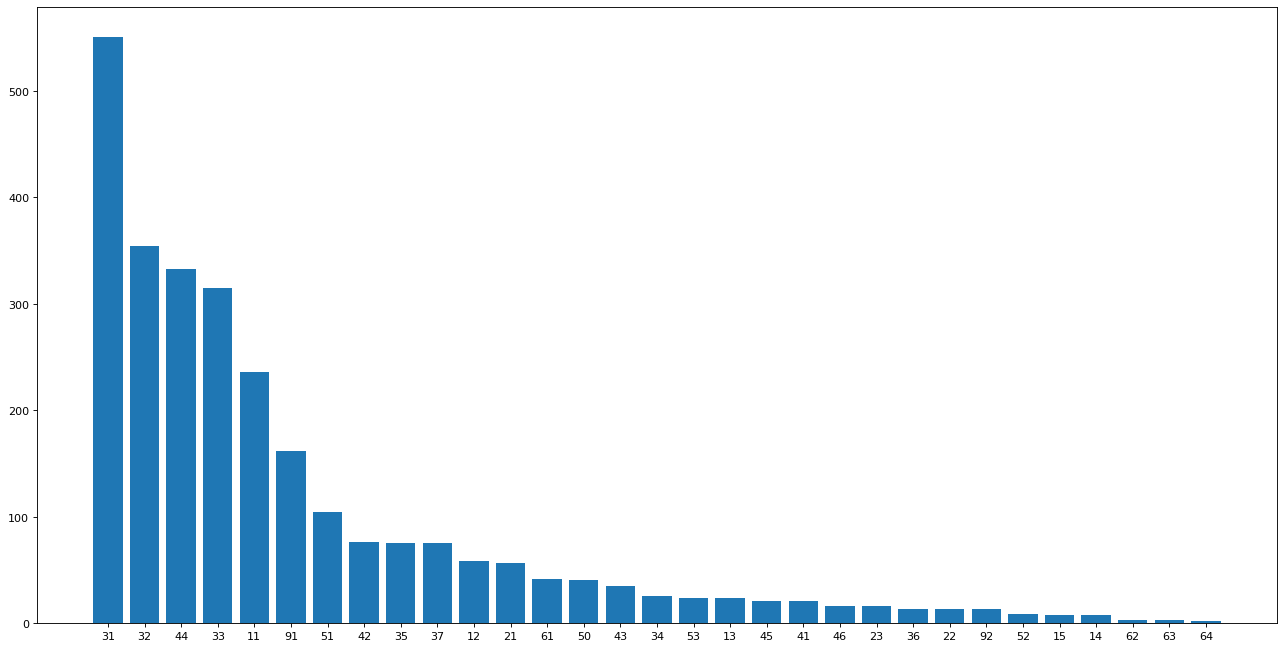

In [19]:
#中国不同省份的星巴克数量，图像绘制
import matplotlib.pyplot as plt
country_cn=df[df['Country']=='CN']
china_province=country_cn.groupby(by="State/Province").count()['Brand'].sort_values(ascending=False) #中国不同省份的星巴克数量，降序排序
plt.figure(figsize=(20,10),dpi=80)
# print(type(china_province))
# print(china_province.index)
plt.bar(china_province.index,china_province.values)

In [23]:
country_cn.dtypes

Brand              object
Store Number       object
Store Name         object
Ownership Type     object
Street Address     object
City               object
State/Province     object
Country            object
Postcode           object
Phone Number       object
Timezone           object
Longitude         float64
Latitude          float64
dtype: object

In [21]:
country_cn[country_cn['State/Province']=='32']


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
3062,Starbucks,48862-265746,Changshu Fangta Street-GF,Joint Venture,Fangta Street and HeDong Street,Changshu,32,CN,215500,NaN,GMT+08:00 Asia/Beijing,120.75,31.64
3063,Starbucks,48238-258108,CZ Wujin Kaia Lomo Plaza Store-GF,Joint Venture,"Huayuan St & Yongsheng Road, Wujin District",Changzhou,32,CN,213000,NaN,GMT+08:00 Asia/Beijing,119.95,31.69
3064,Starbucks,26608-244608,Nanjing Sun Palace Store-GF,Joint Venture,"No.3 yangguang Rd, Xuanwu",Nanjing,32,CN,210000,NaN,GMT+08:00 Asia/Beijing,118.81,32.06
3065,Starbucks,48586-263487,NT Haimen Zhongnan Plaza Store-GF,Joint Venture,"Zhangjian Avenue&Nanhai Road, Haimen City",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.17,31.88
3066,Starbucks,49404-268987,NT Rudong wenfeng Dept Store-GF,Joint Venture,"No.19 North Qingyuan Rd, Rudong",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.18,32.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Starbucks,24743-238567,镇江丹阳吾悦广场店,Joint Venture,"丹阳市开发区, 新民东路99号10#-102铺位",镇江市,32,CN,NaN,NaN,GMT+08:00 Asia/Beijing,119.61,32.00
3412,Starbucks,24065-234944,丹阳金鹰天地店,Joint Venture,"丹阳市, 金鹰天地广场",镇江市,32,CN,212300,NaN,GMT+08:00 Asia/Beijing,119.58,31.99
3413,Starbucks,24740-238713,泰州靖江泰和国际城店,Joint Venture,车站路77号泰和国际城C1-01铺位,靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.26,32.01
3414,Starbucks,24336-236945,泰州靖江文峰大世界店,Joint Venture,"人民北路1号文峰大世界1层1-2单元, 通湖路333号",靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.27,32.02


In [22]:
grouped1 = df[["Brand"]].groupby(by=[df["Country"], df["State/Province"]]).count()
grouped1

Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
...                       ...
US      WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]

In [25]:
grouped1.index #多次group后得到的是层级索引

MultiIndex([('AD',  '7'),
            ('AE', 'AJ'),
            ('AE', 'AZ'),
            ('AE', 'DU'),
            ('AE', 'FU'),
            ('AE', 'RK'),
            ('AE', 'SH'),
            ('AE', 'UQ'),
            ('AR',  'B'),
            ('AR',  'C'),
            ...
            ('US', 'UT'),
            ('US', 'VA'),
            ('US', 'VT'),
            ('US', 'WA'),
            ('US', 'WI'),
            ('US', 'WV'),
            ('US', 'WY'),
            ('VN', 'HN'),
            ('VN', 'SG'),
            ('ZA', 'GT')],
           names=['Country', 'State/Province'], length=545)

In [26]:
grouped2 = df.groupby(by=[df["Country"], df["State/Province"]]).count()
grouped2

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

In [ ]:
#这里可以看出32对应的省是江苏
country_cn[country_cn['State/Province']=='32']

# 设置索引

In [27]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
print(id(a))
a

2178018665744


,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [28]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
# a.columns=list('ABCD')  #a的列名变了，a.columns更换列名
print('-'*50)
print(id(a))
a

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
--------------------------------------------------
2178018665744


,a,b,c,d
a,0,7,one,h
b,1,6,one,j
c,2,5,one,k
d,3,4,two,l
e,4,3,two,m
f,5,2,two,n
g,6,1,two,o


In [31]:
c.values.shape

(7, 4)

In [32]:
print('-'*50)
b=c.reindex(list('abcdefg'))  #返回一个新的df，索引是设置了c的索引后，c索引不变,b是没有值
print(c)
print('-'*50)
b

--------------------------------------------------
   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
--------------------------------------------------


,a,b,c,d
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN


In [30]:
#让某些列变为索引，让c列，d列数据变为索引
a=c.copy()
print(a)
print('-'*50)
a.set_index(['c','d'],inplace=True)#a没变，返回修改后的df,set_index要熟练掌握
a

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
--------------------------------------------------


a  b
c   d      
one h  0  7
    j  1  6
    k  2  5
two l  3  4
    m  4  3
    n  5  2
    o  6  1

### 时间序列

In [31]:
pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range(start="20240708",periods=10,freq='B')

DatetimeIndex(['2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19'],
              dtype='datetime64[ns]', freq='B')

In [34]:
pd.date_range(start="20190101",periods=10,freq='ME')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [35]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [36]:
pd.date_range(start="20240707",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2024-07-07', '2024-07-14', '2024-07-21', '2024-07-28',
               '2024-08-04', '2024-08-11', '2024-08-18', '2024-08-25',
               '2024-09-01', '2024-09-08'],
              dtype='datetime64[ns]', freq='W-SUN')

In [37]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 5)
s

0     3/11/2000
1     3/12/2000
2     3/13/2000
3     3/11/2000
4     3/12/2000
5     3/13/2000
6     3/11/2000
7     3/12/2000
8     3/13/2000
9     3/11/2000
10    3/12/2000
11    3/13/2000
12    3/11/2000
13    3/12/2000
14    3/13/2000
dtype: object

In [39]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
date_ser=pd.to_datetime(s)

In [45]:
date_ser.dt.month

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
dtype: int32

In [50]:
#实战美国911数据
from matplotlib import pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        249737 non-null  float64
 1   lng        249737 non-null  float64
 2   desc       249737 non-null  object 
 3   zip        219391 non-null  float64
 4   title      249737 non-null  object 
 5   timeStamp  249737 non-null  object 
 6   twp        249644 non-null  object 
 7   addr       249737 non-null  object 
 8   e          249737 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 17.1+ MB


In [51]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"]) #转为时间类型

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist() #二维列表
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
 #添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))

df.set_index("timeStamp", inplace=True) #设置索引，时间戳，inplace=True表示在原df上修改

df.head(10)

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 15:39:04,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 16:46:48,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 16:17:05,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 16:51:42,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


timeStamp
2015-12-01    3898
2016-01-01    6063
2016-02-01    5413
2016-03-01    5832
2016-04-01    5684
2016-05-01    5730
2016-06-01    5720
2016-07-01    6029
2016-08-01    6005
2016-09-01    5750
2016-10-01    6039
2016-11-01    5838
2016-12-01    6024
2017-01-01    6082
2017-02-01    5417
2017-03-01    5913
2017-04-01    5780
2017-05-01    5948
2017-06-01    6030
2017-07-01    5974
2017-08-01    5882
2017-09-01    3789
Freq: MS, Name: title, dtype: int64
timeStamp
2015-12-01    1095
2016-01-01    1904
2016-02-01    1868
2016-03-01    1589
2016-04-01    1717
2016-05-01    1573
2016-06-01    1787
2016-07-01    1898
2016-08-01    1907
2016-09-01    1793
2016-10-01    1930
2016-11-01    1765
2016-12-01    1846
2017-01-01    1658
2017-02-01    1462
2017-03-01    1634
2017-04-01    1614
2017-05-01    1670
2017-06-01    1986
2017-07-01    1754
2017-08-01    1862
2017-09-01    1120
Freq: MS, Name: title, dtype: int64
timeStamp
2015-12-01    2923
2016-01-01    5129
2016-02-01    4115
2016-

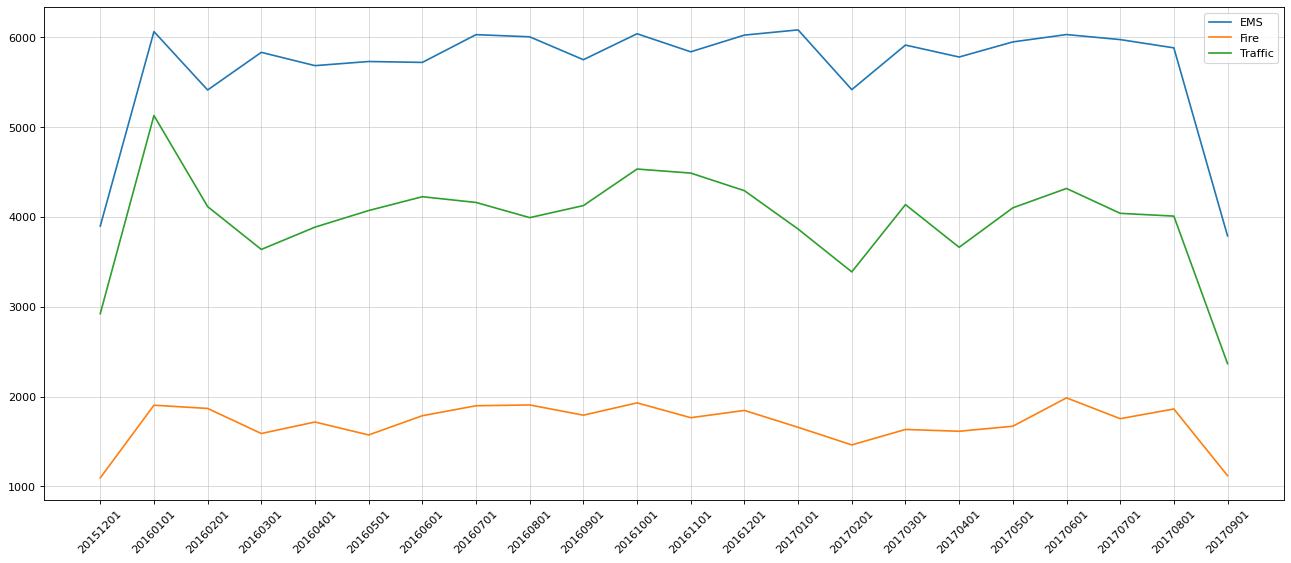

In [55]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
#resample降采样，按月统计,索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图，resample降采样，按月统计,索引必须是时间类型，类似groupby
    count_by_month = group_data.resample("MS").count()["title"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    # print(_x)
    _y = count_by_month.values #values是对应事故发生次数

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.grid(alpha=0.5)
plt.legend(loc="best")
plt.show()

# pm2.5 实战

In [73]:
import pandas as pd
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
# print(df.head(10))

# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex.from_fields(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="h")
df["datetime"] = period
print(df.dtypes)
df.head(30)

No                     int64
year                   int64
month                  int64
day                    int64
hour                   int64
season                 int64
PM_Dongsi            float64
PM_Dongsihuan        float64
PM_Nongzhanguan      float64
PM_US Post           float64
DEWP                 float64
HUMI                 float64
PRES                 float64
TEMP                 float64
cbwd                  object
Iws                  float64
precipitation        float64
Iprec                float64
datetime           period[h]
dtype: object


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,datetime
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,2010-01-01 00:00
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,2010-01-01 01:00
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,2010-01-01 02:00
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,2010-01-01 03:00
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,2010-01-01 04:00
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0,2010-01-01 05:00
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0,2010-01-01 06:00
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0,2010-01-01 07:00
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0,2010-01-01 08:00
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0,2010-01-01 09:00


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   No               52584 non-null  int64    
 1   year             52584 non-null  int64    
 2   month            52584 non-null  int64    
 3   day              52584 non-null  int64    
 4   hour             52584 non-null  int64    
 5   season           52584 non-null  int64    
 6   PM_Dongsi        25052 non-null  float64  
 7   PM_Dongsihuan    20508 non-null  float64  
 8   PM_Nongzhanguan  24931 non-null  float64  
 9   PM_US Post       50387 non-null  float64  
 10  DEWP             52579 non-null  float64  
 11  HUMI             52245 non-null  float64  
 12  PRES             52245 non-null  float64  
 13  TEMP             52579 non-null  float64  
 14  cbwd             52579 non-null  object   
 15  Iws              52579 non-null  float64  
 16  precipitation    52100

In [76]:

df['date_str'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str)

# 将拼接的字符串列转换为日期时间格式
df['date'] = pd.to_datetime(df['date_str'])

df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,...,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,datetime,date_str,date
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,...,43.0,1021.0,-11.0,NW,1.79,0.0,0.0,2010-01-01 00:00,2010-1-1,2010-01-01
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,...,47.0,1020.0,-12.0,NW,4.92,0.0,0.0,2010-01-01 01:00,2010-1-1,2010-01-01
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,...,43.0,1019.0,-11.0,NW,6.71,0.0,0.0,2010-01-01 02:00,2010-1-1,2010-01-01
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,...,55.0,1019.0,-14.0,NW,9.84,0.0,0.0,2010-01-01 03:00,2010-1-1,2010-01-01
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,...,51.0,1018.0,-12.0,NW,12.97,0.0,0.0,2010-01-01 04:00,2010-1-1,2010-01-01


In [77]:

# 把datetime 设置为行索引
df.set_index("date", inplace=True)

In [79]:
# 进行降采样，进行降采样，行索引必须是pd的时间类型
df = df.resample("7D").mean(numeric_only=True)
df.head()


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,,
2010-01-01,84.5,2010.0,1.000000,4.000000,11.5,4.0,NaN,NaN,NaN,71.627586,-18.255952,54.395833,1027.910714,-10.202381,43.859821,0.066667,0.786905
2010-01-08,252.5,2010.0,1.000000,11.000000,11.5,4.0,NaN,NaN,NaN,69.910714,-19.035714,49.386905,1030.035714,-10.029762,45.392083,0.000000,0.000000
2010-01-15,420.5,2010.0,1.000000,18.000000,11.5,4.0,NaN,NaN,NaN,163.654762,-12.630952,57.755952,1030.386905,-4.946429,17.492976,0.000000,0.000000
2010-01-22,588.5,2010.0,1.000000,25.000000,11.5,4.0,NaN,NaN,NaN,68.069307,-17.404762,34.095238,1026.196429,-2.672619,54.854048,0.000000,0.000000
2010-01-29,756.5,2010.0,1.571429,14.285714,11.5,4.0,NaN,NaN,NaN,53.583333,-17.565476,34.928571,1025.273810,-2.083333,26.625119,0.000000,0.000000


In [80]:
df.iloc[312] #因为前面行没有pm2.5数据，所以取中间一行

No                 52500.500000
year                2015.000000
month                 12.000000
day                   28.000000
hour                  11.500000
season                 4.000000
PM_Dongsi            206.271084
PM_Dongsihuan        219.377358
PM_Nongzhanguan      199.566265
PM_US Post           209.244048
DEWP                  -8.559524
HUMI                  70.136905
PRES                1029.934524
TEMP                  -3.202381
Iws                    8.713750
precipitation          0.000000
Iprec                  0.000000
Name: 2015-12-25 00:00:00, dtype: float64

In [81]:
#对比农展馆和美国测试的数据
df= df.loc[:,["PM_US Post","PM_Nongzhanguan"]]
df=df.dropna()  #任何一列为空，整行都删掉（整行，就是整个样本）
data=df.loc[:,"PM_US Post"] #美国大使馆数据
data_china = df.loc[:,"PM_Nongzhanguan"]  #农展馆数据


data.info()
print('-'*50)
print(data_china.head(100))
data_china.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 155 entries, 2013-01-11 to 2015-12-25
Freq: 7D
Series name: PM_US Post
Non-Null Count  Dtype  
--------------  -----  
155 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
--------------------------------------------------
date
2013-01-11     65.333333
2013-01-18    161.054217
2013-01-25    224.006098
2013-02-01     61.145570
2013-02-08    110.478788
                 ...    
2014-11-07     51.617284
2014-11-14    149.935065
2014-11-21    142.590062
2014-11-28     82.012346
2014-12-05    105.767857
Freq: 7D, Name: PM_Nongzhanguan, Length: 100, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 155 entries, 2013-01-11 to 2015-12-25
Freq: 7D
Series name: PM_Nongzhanguan
Non-Null Count  Dtype  
--------------  -----  
155 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [82]:
# 画图
_x = data.index
print(_x)
print('-'*50)
_x = [i.strftime("%Y%m%d") for i in _x]
print(_x)
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x), len(_x_china))

DatetimeIndex(['2013-01-11', '2013-01-18', '2013-01-25', '2013-02-01',
               '2013-02-08', '2013-02-15', '2013-02-22', '2013-03-01',
               '2013-03-08', '2013-03-15',
               ...
               '2015-10-23', '2015-10-30', '2015-11-06', '2015-11-13',
               '2015-11-20', '2015-11-27', '2015-12-04', '2015-12-11',
               '2015-12-18', '2015-12-25'],
              dtype='datetime64[ns]', name='date', length=155, freq='7D')
--------------------------------------------------
['20130111', '20130118', '20130125', '20130201', '20130208', '20130215', '20130222', '20130301', '20130308', '20130315', '20130322', '20130329', '20130405', '20130412', '20130419', '20130426', '20130503', '20130510', '20130517', '20130524', '20130531', '20130607', '20130614', '20130621', '20130628', '20130705', '20130712', '20130719', '20130726', '20130802', '20130809', '20130816', '20130823', '20130830', '20130906', '20130913', '20130920', '20130927', '20131004', '20131011', '201

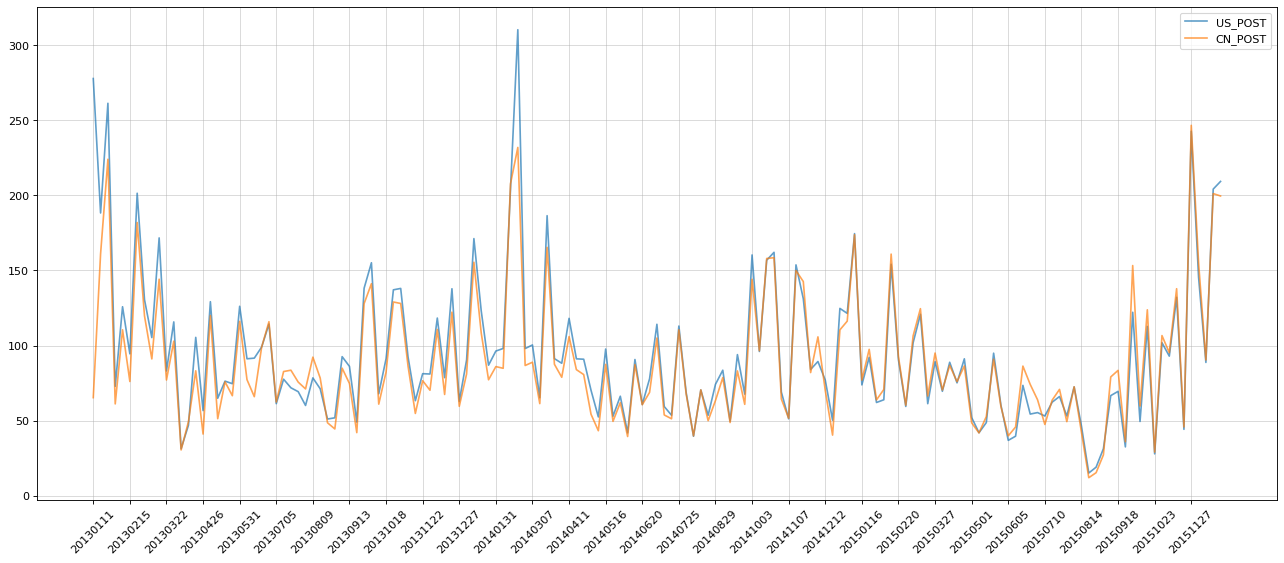

In [85]:
import matplotlib.pyplot as plt
_y = data.values  #美国的
_y_china = data_china.values  #农展馆

plt.figure(figsize=(20, 8), dpi=80)

plt.plot(range(len(_x)), _y, label="US_POST", alpha=0.7)
plt.plot(range(len(_x_china)), _y_china, label="CN_POST", alpha=0.7)

#第一个参数是刻度值，
plt.xticks(range(0, len(_x_china), 5), _x_china[::5], rotation=45)
plt.grid(alpha=0.5)
plt.legend(loc="best")

plt.show()

### 分组运算

In [90]:
import numpy as np
#分组后给名称加前缀
dict_obj = {'key1' : ['a', 'b', 'a', 'b',
                      'a', 'b', 'a', 'a'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)
print('-'*50)


  key1  data1  data2
0    a      6      4
1    b      2      9
2    a      1      2
3    b      2      2
4    a      4      4
5    b      3      8
6    a      2      3
7    a      2      6
--------------------------------------------------


In [91]:
# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').mean(numeric_only=True).add_prefix('mean_')
print(k1_sum)

      mean_data1  mean_data2
key1                        
a       3.000000    3.800000
b       2.333333    6.333333


In [95]:
# 方法2，使用transform，分组后计算结果和原本的df保持一致
k1_sum_tf = df_obj.groupby('key1').transform('mean').add_prefix('mean_')
k1_sum_tf
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

,mean_data1,mean_data2
0,3.000000,3.800000
1,2.333333,6.333333
2,3.000000,3.800000
3,2.333333,6.333333
4,3.000000,3.800000
5,2.333333,6.333333
6,3.000000,3.800000
7,3.000000,3.800000


In [96]:
#实现a组和b组，谁比平均分高，谁比平均分低
def diff_mean(s):
    """
        返回数据与均值的差值，s传入的是某一个分组
    """
    return s - s.mean()

df_obj.groupby('key1').transform(diff_mean)

,data1,data2
0,3.000000,0.200000
1,-0.333333,2.666667
2,-2.000000,-1.800000
3,-0.333333,-4.333333
4,1.000000,0.200000
5,0.666667,1.666667
6,-1.000000,-0.800000
7,-1.000000,2.200000


# 星际争霸--练习groupby的apply操作

In [97]:
import pandas as pd
dataset_path = './starcraft.csv'
df_data = pd.read_csv(dataset_path, usecols=['LeagueIndex', 'Age', 'HoursPerWeek',
                                             'TotalHours', 'APM'])
df_data

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27.0,10.0,3000.0,143.7180
1,5,23.0,10.0,5000.0,129.2322
2,4,30.0,10.0,200.0,69.9612
3,3,19.0,20.0,400.0,107.6016
4,3,32.0,10.0,500.0,122.8908
...,...,...,...,...,...
3390,8,NaN,NaN,NaN,259.6296
3391,8,NaN,NaN,NaN,314.6700
3392,8,NaN,NaN,NaN,299.4282
3393,8,NaN,NaN,NaN,375.8664


In [102]:
#apply比agg厉害的地方在于传参数
def top_n(df, n=3, column='APM'):
    """
        df是代表某个分组的数据，返回每个分组按 column 的 top n 数据
    """
    return df.sort_values(by=column, ascending=False)[:n]

print(df_data.groupby('LeagueIndex').apply(top_n,include_groups=False))

                   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                               
1           2214  20.0          12.0       730.0  172.9530
            2246  27.0           8.0       250.0  141.6282
            1753  20.0          28.0       100.0  139.6362
2           3062  20.0           6.0       100.0  179.6250
            3229  16.0          24.0       110.0  156.7380
            1520  29.0           6.0       250.0  151.6470
3           1557  22.0           6.0       200.0  226.6554
            484   19.0          42.0       450.0  220.0692
            2883  16.0           8.0       800.0  208.9500
4           2688  26.0          24.0       990.0  249.0210
            1759  16.0           6.0        75.0  229.9122
            2637  23.0          24.0       650.0  227.2272
5           3277  18.0          16.0       950.0  372.6426
            93    17.0          36.0       720.0  335.4990
            202   37.0          14.0       800.0  327.72

In [105]:
# apply函数接收的参数会传入自定义的函数中
m=df_data.groupby('LeagueIndex').apply(top_n, n=4, column='Age',include_groups=False)
m

Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                               
1           3146  40.0          12.0       150.0   38.5590
            3040  39.0          10.0       500.0   29.8764
            721   38.0          16.0       300.0   71.5950
            3298  37.0          12.0       300.0   22.0596
2           920   43.0          10.0       730.0   86.0586
            2437  41.0           4.0       200.0   54.2166
            1175  41.0           8.0       250.0   54.2406
            479   40.0          14.0       500.0   51.8358
3           1258  41.0          14.0       800.0   77.6472
            2972  40.0          10.0       500.0   60.5970
            3176  40.0          16.0       580.0   46.8714
            2882  39.0          12.0       450.0   53.7690
4           1696  44.0           6.0       500.0   89.5266
            1729  39.0           8.0       500.0   86.7246
            1298  36.0          10.0       400.0   73.6980
            1106  35.0          16.0       800.0  107.0412
5           202   37.0          14.0       800.0  327.7218
            2745  37.0          18.0      1000.0  123.4098
            653   35.0          12.0       800.0  115.0644
            3310  34.0           4.0       364.0   77.5512
6           3069  31.0           8.0       800.0  133.1790
            2706  31.0           8.0       700.0   66.9918
            929   30.0          28.0      1500.0  123.3774
            1240  29.0          20.0       800.0  141.6246
7           2813  26.0          36.0      1300.0  188.5512
            1992  26.0          24.0      1000.0  219.6690
            1073  25.0          10.0       900.0  178.8342
            320   25.0          42.0      2400.0  182.6208
8           3340   NaN           NaN         NaN  189.7404
            3341   NaN           NaN         NaN  287.8128
            3342   NaN           NaN         NaN  294.0996
            3343   NaN           NaN         NaN  274.2552

In [108]:
# group_keys为False后，被groupby的列不会变为索引
n=df_data.groupby('LeagueIndex', group_keys=False).apply(top_n,include_groups=True)
n

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7420\4153032033.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  n=df_data.groupby('LeagueIndex', group_keys=False).apply(top_n,include_groups=True)


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
2214,1,20.0,12.0,730.0,172.9530
2246,1,27.0,8.0,250.0,141.6282
1753,1,20.0,28.0,100.0,139.6362
3062,2,20.0,6.0,100.0,179.6250
3229,2,16.0,24.0,110.0,156.7380
1520,2,29.0,6.0,250.0,151.6470
1557,3,22.0,6.0,200.0,226.6554
484,3,19.0,42.0,450.0,220.0692
2883,3,16.0,8.0,800.0,208.9500
2688,4,26.0,24.0,990.0,249.0210
